<div style="padding:20px;color:white;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#C85C8E;overflow:hidden;font-weight:500">Heart Disease Prediction Using Adaboost ❤️❤️❤️ </div>





# **Table of Contents**

1.	[Introduction](#1)
2.	[Data Preprocessing](#2)
3.	[Model Training](#3)
4.	[Evaluation](#4)
5.	[K Fold Cross Validation](#5)


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Introduction
    </h1>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Importing Libraries
    </h3>
</div>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
df=pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# --- Fix Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

In [4]:
df.shape

(1025, 14)

In [5]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


<div id='2'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Data Preprocessing
    </h1>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">One-Hot Encoding
    </h3>
</div>

In [6]:
# categorical columns
cp = pd.get_dummies(df['cp'],prefix= 'cp')
thal = pd.get_dummies(df['thal'],prefix = 'thal')
slope = pd.get_dummies(df['slope'],prefix = 'slope')

#merge dummy variables to main data frame
frames = [ df,cp,thal,slope]
df = pd.concat(frames,axis=1)

#Dropping the unnecessory variables
df=df.drop(columns = ['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [7]:
#Missing values
df.isnull().sum()

age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      0
cp_0        0
cp_1        0
cp_2        0
cp_3        0
thal_0      0
thal_1      0
thal_2      0
thal_3      0
slope_0     0
slope_1     0
slope_2     0
dtype: int64

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Separating Target Variable
    </h3>
</div>

In [8]:
#Declaring Dependent and Independent variables
X = df.drop(['target'],axis=1)
y = df['target']

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Data Normalization
    </h3>
</div>

In [9]:
X = MinMaxScaler().fit_transform(X)

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Splitting Training and Testing Dataset
    </h3>
</div>

In [10]:
#Splitting x and y into training and testing datasets

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)

In [11]:
#checking the shape of X_train and X_test
X_train.shape, X_test.shape

((820, 21), (205, 21))

<div id='3'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Model Training
    </h1>
</div>

In [12]:
model = AdaBoostClassifier(n_estimators=3)

# Train Adaboost Classifer
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.848780487804878


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Splitting Training and Testing Dataset
    </h3>
</div>

In [13]:
# import Support Vector Classifier
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')

# create adaboost classifer object
model2 =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=0)

# train adaboost classifer
model2.fit(X_train, y_train)

# predict test dataset
y_pred = model2.predict(X_test)

# calculate and print model accuracy
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

Model Accuracy with SVC Base Estimator: 0.7707317073170732


<div id='4'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Evaluation
    </h1>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Accuracy
    </h3>
</div>

In [14]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Model Test Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Test Accuracy : 0.8488
Model Train Accuracy : 0.8476


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Confusion Matrix
    </h3>
</div>

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[87 20]
 [11 87]]

True Positives(TP) =  87

True Negatives(TN) =  87

False Positives(FP) =  20

False Negatives(FN) =  11


<AxesSubplot:>

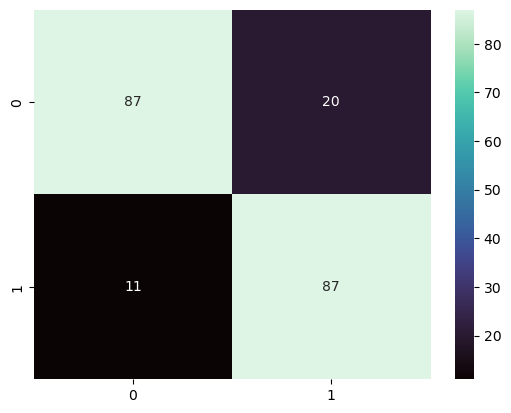

In [16]:
sns.heatmap(cm,annot= True, fmt='d', cmap='mako')

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Classification Report
    </h3>
</div>

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       107
           1       0.81      0.89      0.85        98

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Scores from Confusion Matrix
    </h3>
</div>

In [18]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.8488
Classification error : 0.1512
Precision : 0.8131
Recall or Sensitivity : 0.8878
True Positive Rate : 0.8878
False Positive Rate : 0.1869
Specificity : 0.8131


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC Curve
    </h3>
</div>

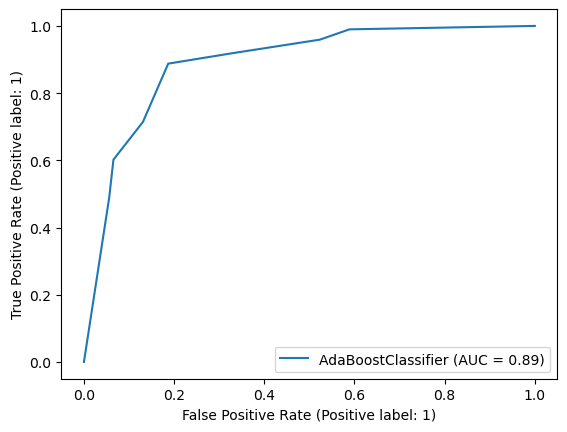

In [19]:
from sklearn import metrics
metrics.plot_roc_curve(model,X_test,y_test)
plt.show()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC AUC Score
    </h3>
</div>

In [20]:
# compute ROC AUC
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8905


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Cross Validation Score
    </h3>
</div>

In [21]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score

print('\nAverage cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.85365854 0.92682927 0.84146341 0.84146341 0.7804878  0.86585366
 0.85365854 0.7195122  0.87804878 0.86585366]

Average cross-validation score: 0.8427


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h1 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">K Fold Cross Validation
    </h1>
</div>

In [22]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)

model=AdaBoostClassifier()


linear_scores = cross_val_score(model, X, y, cv=kfold)
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:{}'.format(linear_scores))
# print average cross-validation score with linear kernel

print('\nAverage stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:[0.92195122 0.91707317 0.89756098 0.89756098 0.87317073]

Average stratified cross-validation score with linear kernel:0.9015


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #0E8388;">
    <h1 style = "padding: 30px; 
                 color: white;
                 font-weight:600;
                 font-size:50px;
                 text-align: CENTER;
                 font-family: Tilt Warp;">PLEASE UPVOTE IF IT HELPED
    </h1>
</div>